## Clustering

In this lesson, we cover clustering theory, and distance & similarity measures. We use python apply and evaluate various clustering techniques such as hierarchical clustering, k-means clustering,DBSCAN and PAM.  We look at techniques to help choose the number of clusters as well as how to evaluating cluster performance. 

In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

## Clustering

What is [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis)?
Clustering is grouping like with like such that:  

* Similar objects are close to one another within the same cluster.  
* Dissimilar to the objects in other clusters.  

![cluster analysis](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/440px-Cluster-2.svg.png)

*cluster analysis*  
  
## Distance & Similarity Measures

There are two primary approaches to measure the "closeness" of data, distance and similarity. Distance measures are based in the notion of a [metric space](https://en.wikipedia.org/wiki/Metric_space).

[Similarity measures](https://en.wikipedia.org/wiki/Similarity_measure) s a real-valued function that quantifies the similarity between two objects. While no single definition of a similarity measure exists, they don't necessarily have the constraint of being a metric space.  For example, [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) is a measure of the "closeness" of two vectors that is not a metric space.

### Metric Spaces

A *metric space* is an *ordered pair* $(M,d)$ where $M$ is a set and $d$ is a distance (i.e.metric) on $M$, i.e., a function:  

$d \colon M \times M \rightarrow \mathbb{R}$

such that for any $x, y, z \in M$, the following holds:  

* $d(x,y) \ge 0 \quad (non-negative),$  
* $d(x,y) = 0, \iff x = y \quad (identity \quad of \quad indiscernibles),$  
* $d(x,y) = d(y,x), \quad (symmetry).$  
* $d(x,z) \le d(x,y) + d(y,z) \quad  (triangle \quad inequality)$  

#### Examples of Metric Spaces

Examples of Metric Spaces are [Chebyshev distance](https://en.wikipedia.org/wiki/Chebyshev_distance), [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance), [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) and many others.
 
### Euclidean distance

Euclidean distance is the most common metric for measuring the distance between two vectors. The is the stadard Cartesian coordinates. That is, if $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in Euclidean n-space, then the distance (d) from p to q, or from q to p is given by the Pythagorean formula:

$$\begin{align}\mathrm{d}(\mathbf{p},\mathbf{q}) = \mathrm{d}(\mathbf{q},\mathbf{p}) & = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2} \\[8pt]
& = \sqrt{\sum_{i=1}^n (q_i-p_i)^2}.\end{align}$$  


### Similarity Measures

Similarity (or dimilarity measures) measure closeness without the constraints and benefits of being a formal metric space.

### Cosine similarity

The most common form of the similarity measure is the vector inner product (or [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity))
Given vectors A and B, the vector inner product can be defined using the [Euclidean dot product](https://en.wikipedia.org/wiki/Euclidean_vector#Dot_product) formula:

$$\mathbf{a}\cdot\mathbf{b}
=\left\|\mathbf{a}\right\|\left\|\mathbf{b}\right\|\cos\theta$$

This similarity measure can also be ranged normalized. Alternately, we can normalize this measure by dividing each vector component by the magnitude of the vector.

### Pearson correlation

Correlation based similarity is usually the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). Pearson product-moment correlation coefficient commonly represented by the Greek letter $\rho$ (rho) and is defined as:

$$ \rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} $$

where $\operatorname{cov}$ is the [covariance](https://en.wikipedia.org/wiki/Covariance) and  $\sigma_X$ is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of $X$.  

The formula for $\rho$can be expressed in terms of mean and expectation.  

$$\operatorname{cov}(X,Y) = E[(X-\mu_X)(Y-\mu_Y)]$$ 


## Clustering Data Structures

* Data matrix

$$ 
M=
  \begin{bmatrix}
    x_{1,1} & x_{1,2} & x_{1,3} & ...  & x_{1,n} \\
    x_{2,1} & x_{2,2} & x_{2,3} & ...  & x_{2,n} \\
    x_{3,1} & x_{3,2} & x_{3,3} & ...  & x_{3,n} \\    
    .. & .. & .. & ...  & .. \\    
    x_{n,1} & x_{n,2} & x_{n,3} & ...  & x_{n,n} \\    
  \end{bmatrix}
$$

Distance matrix

$$ 
M=
  \begin{bmatrix}
    x_{1,1} &   &  &   &  \\   
    x_{2,1} & 0  &  &   &  \\   
    x_{3,1} & x_{3,2} & 0 &   &  \\    
    .. & .. & .. & ...  & .. \\    
    x_{n,1} & x_{n,2} & x_{n,3} & ...  & 0 \\    
  \end{bmatrix}
$$

* Dissimilarity/Similarity matrix


The dissimilarity/similarity matrix is calculated by iterating over each element and calculating its dissimilarity/similarity to every other element. Let A be a Dissimilarity Matrix of size $NxN$, and $B$ a set of $N$ elements. $A_{i,j}$ is the dissimilarity/similarity between elements $B_i$ and $B_j$.  


```

   for i = 0 to N do
       for j = 0 to N do
           Aij = Dissimilarity(Bi,Bj) // or Similarity(Bi,Bj)
       end-for
   end-for
   
```     
   
where the dissimilarity/similarity matrix is usually defined as follows:

$$ 
M=
  \begin{bmatrix}
    0 &   &  &   &  \\   
   d(2,1)  & 0  &  &   &  \\   
   d(3,1)  & d(3,2) & 0 &   &  \\    
    .. & .. & .. & ...  & .. \\    
    d(n,1)  & d(n,2) & d(n,3) & ...  & 0 \\    
  \end{bmatrix}
$$



## Types of  Clustering

[Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) (e.g., k-means, mixture models, hierarchical clustering). Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). There are various types of cluster analysis.  

* Partitioning-based clustering (K-means and its variants)
* Hierarchical clustering
* Density-based clustering

### Partitioning-based clustering (K-means and its variants)

Partitioning algorithms: Construct various partitions and then evaluate them by some criterion
Hierarchy algorithms: Create a hierarchical decomposition of the set of data (or objects) using some criterion
Density-based: based on connectivity and density functions
Grid-based: based on a multiple-level granularity structure
Model-based: A model is hypothesized for each of the clusters and the idea is to find the best fit of that model to each other


Partitioning method: Construct a partition of n documents into a set of K clusters
Given: a set of documents and the number K 
Find: a partition of K clusters that optimizes the chosen partitioning criterion
Globally optimal
Intractable for many objective functions
Ergo, exhaustively enumerate all partitions
Effective heuristic methods: K-means and K-medoids algorithms


### K-means

The term "k-means" was first used by James MacQueen in 1967,[1] though the idea goes back to Hugo Steinhaus in 1957. Given a desired $k$ clusters and n data points $X = {x_1, x_2, …, x_n}$: 

Initialize centroids $\mu_1, \mu_1, ... \mu_k \quad \in \quad  \mathbb{R}^n$  (usually randomly)  


while (not coverged):

Step A (Assignment step):  

  Find the closest cluster to every point in $X = {x_1, x_2, …, x_n}$
  
  That is,   
$$\underset{\mathbf{X}} {\operatorname{arg\,min}}  \sum_{i=1}^{k} \sum_{\mathbf x \in X_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2$$

where $\mu_i$ is the mean of points in $X_i$.

$$
S_i^{(t)} = \big \{ x_p : \big \| x_p - m^{(t)}_i \big \|^2 \le \big \| x_p - m^{(t)}_j \big \|^2 \ \forall j, 1 \le j \le k \big\}
$$  

Step B (Update step): 

  Calculate the new means to be the centroids of the observations in the new clusters.

$$
m^{(t+1)}_i = \frac{1}{|X^{(t)}_i|} \sum_{x_j \in X^{(t)}_i} x_j 
$$

The [centroid](https://en.wikipedia.org/wiki/Centroid) of a finite set of {k} points  

$$
\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_k in \mathbb{R}^n \quad is\quad 
\mathbf{C} = \frac{\mathbf{x}_1+\mathbf{x}_2+\cdots+\mathbf{x}_k}{k}
$$


#### Demonstration of the k-means algorithm

Demonstration of the standard algorithm (from [k-means algorithm](https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm)  

![k initial controids](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/249px-K_Means_Example_Step_1.svg.png)  

1. k initial "means" (in this case k=3) are randomly generated within the data domain (shown in color).  

![find nearest cluster](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/278px-K_Means_Example_Step_2.svg.png)  

2. k clusters are created by associating every observation with the nearest mean. The partitions here represent the [Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram) generated by the means.  

![new centroid](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/278px-K_Means_Example_Step_3.svg.png)  

3. The centroid of each of the k clusters becomes the new mean.  

![k-means algorithm converges](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/278px-K_Means_Example_Step_4.svg.png)  

4. Steps 2 and 3 are repeated until convergence has been reached. The k-means algorithm converges when no points are assigned new clusters.  

#### Problems with k-means clustering

For problems with k-means clustering see [K-means clustering is not a free lunch](http://varianceexplained.org/r/kmeans-free-lunch/)


### K-medoids (PAM)

The K-medoids or Partitioning Around Medoids (PAM) algorithm (Kaufman & Rousseeuw’87) is related to the k-means algorithm and but uses medoid shifts rather than reassigning points based on Euclidean distance.  Each cluster is represented by one of the objects (i.e. points) in the cluster  A medoid is a point in a cluster whose dissimilarity to all the points in the cluster is minimal. Medoids are similar in concept to means or centroids, but medoids are always members of the data set. That is, in 2D [Cartesian space](https://en.wikipedia.org/wiki/Cartesian_coordinate_system) a centroid can be any valid x.y coordinate. Whereas a medoid must be one of the data points. (The data point least dissimilar to the rest.)

Pseduocode for the k-medoid clustering (Partitioning Around Medoids (PAM)) algorithm:  


```
Initialize: randomly select[citation needed] (without replacement) k of the n data points as the medoids

Associate each data point to the closest medoid.

While the cost of the configuration decreases:
  For each medoid m, for each non-medoid data point o:
    Swap m and o, recompute the cost

  If the total cost of the configuration increased in the previous step, undo   the swap.

```

### DBScan

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

_Preliminary_

Consider a set of points in some space to be clustered. For the purpose of DBSCAN clustering, the points are classified as core points, (density-)reachable points and outliers, as follows:

* A point $p$ is a core point if at least $minPts$ points are within distance $epsilon$. $epsilon$ is the maximum radius of the neighborhood from $p$). Those points are said to be directly reachable from $p$. By definition, no points are directly reachable from a non-core point.
* A point $q$ is reachable from $p$ if there is a path $p_1, ..., p_n$ with $p_1 = p and p_N = q$, where each $p_{i+1}$ is directly reachable from $p_i$ (all the points on the path must be core points, with the possible exception of $q$).
* All points not reachable from any other point are outliers.

Now if $p$ is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points.

Reachability is not a symmetric relation since, by definition, no point may be reachable from a non-core point, regardless of distance (so a non-core point may be reachable, but nothing can be reached from it). Therefore a further notion of connectedness is needed to formally define the extent of the clusters found by DBSCAN. Two points $p$ and $q$ are density-connected if there is a point $o$ such that both $p$ and $q$ are density-reachable from $o$. Density-connectedness is symmetric.

A cluster then satisfies two properties:
* All points within the cluster are mutually density-connected.
* If a point is density-reachable from any point of the cluster, it is part of the cluster as well.


DBScan

_ DBScan Algorithm_   

DBSCAN requires two parameters: $epsilon$ (eps) and the minimum number of points required to form a dense region. While minPts intuitively is the minimum cluster size, in some cases DBSCAN can produce smaller clusters. A DBSCAN cluster consists of at least one core point. As other points may be border points to more than one cluster, there is no guarantee that at least minPts points are included in every cluster. It starts with an arbitrary starting point that has not been visited. This point's $epsilon$-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized $epsilon$-environment of a different point and hence be made part of a cluster.

If a point is found to be a dense part of a cluster, its $epsilon$-neighborhood is also part of that cluster. Hence, all points that are found within the $epsilon$-neighborhood are added, as is their own $epsilon$-neighborhood when they are also dense. This process continues until the density-connected cluster is completely found. Then, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

The algorithm can be expressed as follows, in pseudocode following the original published nomenclature:

```
 DBSCAN(D, eps, MinPts) {
    C = 0
    for each point P in dataset D {
       if P is visited
          continue next point
       mark P as visited
       NeighborPts = regionQuery(P, eps)
       if [[sizeof]](NeighborPts) < MinPts
          mark P as NOISE
       else {
          C = next cluster
          expandCluster(P, NeighborPts, C, eps, MinPts)
       }
    }
 }
 
 expandCluster(P, NeighborPts, C, eps, MinPts) {
    add P to cluster C
    for each point P' in NeighborPts { 
       if P' is not visited {
          mark P' as visited
          NeighborPts' = regionQuery(P', eps)
          if [[sizeof]](NeighborPts') >= MinPts
             NeighborPts = NeighborPts joined with NeighborPts'
       }
       if P' is not yet member of any cluster
          add P' to cluster C
    }
 }
 
 regionQuery(P, eps)
    return all points within P's eps-neighborhood (including P)
```

Note that the algorithm can be simplified by merging the per-point "has been visited" and "belongs to cluster C" logic, as well as by [[inlining]] the contents of the "expandCluster" subroutine, which is only called from one place. These simplifications have been omitted from the above pseudocode in order to reflect the originally published version. Additionally, the regionQuery function need not return P in the list of points to be visited, as long as it is otherwise still counted in the local density estimate.



_Advantages_

* DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.
* DBSCAN can find arbitrarily shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the so-called single-link effect (different clusters being connected by a thin line of points) is reduced.
* DBSCAN has a notion of noise, and is robust to outliers.
* DBSCAN requires just two parameters and is mostly insensitive to the ordering of the points in the database. (However, points sitting on the edge of two different clusters might swap cluster membership if the ordering of the points is changed, and the cluster assignment is unique only up to isomorphism.)
* DBSCAN is designed for use with databases that can accelerate region queries, e.g. using an $R*$ tree.
* The parameters minPts and $epsilon$ can be set by a domain expert, if the data is well understood.


_Disadvantages_
* DBSCAN is not entirely deterministic: border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data is processed. Fortunately, this situation does not arise often, and has little impact on the clustering result both on core points and noise points, DBSCAN is deterministic. DBSCAN* is a variation that treats border points as noise, and this way achieves a fully deterministic result as well as a more consistent statistical interpretation of density-connected components.
* The quality of DBSCAN depends on the distance measure used in the function regionQuery(P,$epsilon$). The most common distance metric used is Euclidean distance. Especially for clustering high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for $epsilon$. This effect, however, is also present in any other algorithm based on Euclidean distance.
* DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-$epsilon$ combination cannot then be chosen appropriately for all clusters.
* If the data and scale are not well understood, choosing a meaningful distance threshold $epsilon$ can be difficult.


### Hierarchical clustering

In [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) the idea is to group data objects (i.e. points) into a tree of clusters. That is, hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. 

These trees (hierarchies) generally fall into two types:

### Agglomerative hierarchical clustering 

Initially each data object (i.e. point) in its own cluster. Iteratively the clusters are merged together from the "bottom-up." The two most similar/closest objects are aggreated in to the same cluster/data object. Then the next two, until there is just one cluster/data object. This agglomerative approach result in “straggly” (long and thin) clusters due to a chaining effect. It is also sensitive to noise.



### Divisive hierarchical clustering 

in divisive hierarchical clustering all data objects (i.e. points) are initially in one cluster. These clusters are successively divided recursivley in a "top-down" manner. The cluster is broken in to two clusters that are most dissimilar. Then each of those clusters is broken in to two cluster that are most dissimilar. This continues until each clsuter is a single data object (i.e. point).

### Linkage criteria

* Single Link: smallest distance between points
    + $\min \, \{\, d(a,b) : a \in A,\, b \in B \,\}$
* Complete Link: largest distance between points
    +  $\max \, \{\, d(a,b) : a \in A,\, b \in B \,\}$
* Average Link: average distance between points
    + $\frac{1}{|A| |B|} \sum_{a \in A }\sum_{ b \in B} d(a,b)$ 
* Centroid: distance between centroids
    +  $||c_s - c_t ||$  where $c_s$ and $c_t$ are the centroids of clusters $s$ and $t$, respectively.
* Minimum energy clustering: a statistical distance between probability distributions.
    +  $\frac{2}{nm}\sum_{i,j=1}^{n,m} \|a_i- b_j\|_2 - \frac{1}{n^2}\sum_{i,j=1}^{n} \|a_i-a_j\|_2 - \frac{1}{m^2}\sum_{i,j=1}^{m} \|b_i-b_j\|_2 $


## Density-based clustering

Density-based clustering is similar to k-means clustering, except that it uses the [expectation-maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), to generate a likelihood that for each data objects (i.e. points) belong to a cluster. In the special case of a Gaussian mixture model, specifically, the limit of taking all covariances as diagonal, equal, and small. A k-means problem can be  generalized into a Gaussian mixture model.

Density-based clustering uses a density estimator to learn a probalistic mapping from a set of attributes to a probability.

Input -> Density Estimator -> Probability

Given a data object x(i.e. point), a density estimator M can tell you how likely x belongs to cluster k.

Given a statistical model which generates a set $\mathbf{X}$ of observed data (e.g. assuming it comes for a Gaussian distribution), a set of unobserved latent data or missing values $\mathbf{Z}$, and a vector of unknown parameters $\boldsymbol\theta$, along with a likelihood function $L(\boldsymbol\theta; \mathbf{X}, \mathbf{Z}) = p(\mathbf{X}, \mathbf{Z}|\boldsymbol\theta),$ the maximum likelihood estimate (MLE) of the unknown parameters is determined by the marginal likelihood of the observed data $L(\boldsymbol\theta; \mathbf{X}) = p(\mathbf{X}|\boldsymbol\theta) = \sum_{\mathbf{Z}} p(\mathbf{X},\mathbf{Z}|\boldsymbol\theta)$  


The EM algorithm seeks to find the MLE of the marginal likelihood by iteratively applying the following two steps:

Expectation step (E step): Calculate the expected value of the log likelihood function, with respect to the conditional distribution of $\mathbf{Z}$ given $\mathbf{X}$ under the current estimate of the parameters  

$$\boldsymbol\theta^{(t)}:
Q(\boldsymbol\theta|\boldsymbol\theta^{(t)}) = \operatorname{E}_{\mathbf{Z}|\mathbf{X},\boldsymbol\theta^{(t)}}\left[ \log L(\boldsymbol\theta;\mathbf{X},\mathbf{Z})  \right] $$  

Maximization step (M step): Find the parameter that maximizes this quantity:

$$ \boldsymbol\theta^{(t+1)} = \underset{\boldsymbol\theta}{\operatorname{arg\,max}} Q(\boldsymbol\theta|\boldsymbol\theta^{(t)})
$$


# Good Clustering?

Evaluation of clustering results sometimes is referred to as cluster validation.

* high intra-class distance/similarity
* low inter-class distance/similarity 


Cluster Cohesion: Measures how closely related are objects in a cluster.  

Cluster Separation: Measure how distinct or well-separated a cluster is from other clusters.  


The quality of a clustering result depends on both the similarity measure used by the method and its implementation

## Visualization

There are a number of packages for plotting clusters:

* R package [rggobi](https://cran.r-project.org/web/packages/rggobi/index.html) along with [GGobi.org](http://www.ggobi.org/)
* R package [clusterfly](http://had.co.nz/model-vis/)
* other R packages 

We'll focus on dendrograms,  multidimensional scaling (MDS) and plotting a confusion matrix.

### Dendrogram

A [dendrogram](https://en.wikipedia.org/wiki/Dendrogram) is a tree data structure which illustrates hierarchical (or taxonomic) relationships

* Each level shows clusters for that level.
* Leaf – individual clusters
* Root – one cluster
* A cluster at level $i$ is the union of its children clusters at level $i+1$


![A dendrogram](http://54.198.163.24/YouTube/MachineLearning/M04/Dendrogram.png)

*A dendrogram*

### Multidimensional scaling (MDS) 

[Multidimensional scaling (MDS)](https://en.wikipedia.org/wiki/Multidimensional_scaling) is a means of visualizing the level of similarity of individual cases of a high-dimenional dataset.

Given a dataset of I objects (colors, faces, stocks, . . .) on which a distance function is defined, $\delta_{i,j} :=$ distance between $i-th$ and $j-th$ objects. These distances are the entries of the dissimilarity matrix
$$
\Delta := 
\begin{pmatrix}
\delta_{1,1} & \delta_{1,2} & \cdots & \delta_{1,I} \\
\delta_{2,1} & \delta_{2,2} & \cdots & \delta_{2,I} \\
\vdots & \vdots & & \vdots \\
\delta_{I,1} & \delta_{I,2} & \cdots & \delta_{I,I}
\end{pmatrix}.
$$

The goal of MDS is, given $\Delta$, to find I vectors $x_1,\ldots,x_I \in \mathbb{R}^N$ such that $\|x_i - x_j\| \approx \delta_{i,j}$ for all $i,j\in {1,\dots,I}$, where $\|\cdot\|$ is a vector norm. In classical MDS, this norm is the Euclidean distance, but,  it may be a metric or arbitrary distance function.  

In other words, MDS attempts to find an embedding from the I objects into $\mathbb{R}^N$ such that distances are preserved.

![multidimensional scaling](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/RecentVotes.svg/800px-RecentVotes.svg.png)

*An example of classical multidimensional scaling applied to voting patterns in the United States House of Representatives*

### Confusion plots

confusion plot is a plot of the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). A confusion matrix, also known as a contingency table or an error matrix. 


A confusion matrix is a 2x2 table with counts of the following in each of its quadrents.

```
true positive (TP)
eqv. with hit
true negative (TN)
eqv. with correct rejection
false positive (FP)
eqv. with false alarm, Type I error
false negative (FN)
eqv. with miss, Type II error
```

## Cluster evaluation metics

Cluster evaluation metics quantitate within cluster cohesion and between cluster Separation.

### Measuring Cluster Validity via Correlation

Compute can compute the correlation between the two matrices (a proximity patrix and “incidence” matrix). Since the matrices are symmetric, only the correlation between $frac{n(n-1)}{2}$ entries needs to be calculated. (ie. above or below the diagonal).

High correlation indicates that points that belong to the same cluster are close to each other. This is not a good measure for some density or contiguity based clusters.

*Proximity Matrix*

A proximity is a measurement of the similarity or dissimilarity, broadly defined, of a pair of objects. If measured for all pairs of objects in a set (e.g. driving distances among a set of U.S. cities), the proximities are represented by an object-by-object proximity matrix.

“Incidence” Matrix

An “incidence” matrix

* One row and one column for each data point
* An entry is 1 if the associated pair of points belong to the same cluster
* An entry is 0 if the associated pair of points belongs to different clusters

### Using Similarity Matrix for Cluster Validation

One can sort the similarity matrix with respect to cluster labels amd then plot.

### Davies–Bouldin index  

The [Davies–Bouldin index](https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index) can be represented by the formula below:

$$ DB = \frac {1} {n} \sum_{i=1}^{n} \max_{j\neq i}\left(\frac{\sigma_i + \sigma_j} {d(c_i,c_j)}\right)
$$

where n is the number of clusters,$c_x$ is the centroid of cluster x, $\sigma_x$ is the average distance of all elements in cluster x to centroid $c_x$, and $d(c_i,c_j)$ is the distance between centroids $c_i$ and $c_j$.

Clusters with low intra-cluster distances (high intra-cluster similarity) and high inter-cluster distances (low inter-cluster similarity) will have a low Davies–Bouldin index.

### Dunn index

The [Dunn index](https://en.wikipedia.org/wiki/Dunn_index) aims to identify dense and well-separated clusters. It is defined as the ratio between the minimal inter-cluster distance to maximal intra-cluster distance. For each cluster partition, the Dunn index can be calculated by the following formula:

$$
D = \frac{\min_{1 \leq i < j \leq n} d(i,j)}{\max_{1 \leq k \leq n} d^{\prime}(k)} \,
$$

where $d(i,j)$ represents the distance between clusters $i$ and $j$, and $d '(k)$ measures the intra-cluster distance of cluster $k$. The inter-cluster distance $d(i,j)$ between two clusters may be any number of distance measures, such as the distance between the centroids of the clusters. 

Clusters with high intra-cluster similarity and low inter-cluster similarity, produce clusters with high Dunn index (i.e. are more desirable).


### Silhouette coefficient

The silhouette coefficient contrasts the average distance to elements in the same cluster with the average distance to elements in other clusters. Objects with a high silhouette value are considered well clustered, objects with a low value may be outliers. This index works well with k-means clustering, and is also used to determine the optimal number of clusters.


### Purity  (as an evaluation measure)

Simple measure: purity, the ratio between the dominant class in the cluster $c_i$ and the size of cluster$c_i$. To compute purity , each cluster is assigned to the class which is most frequent in the cluster, and then the accuracy of this assignment is measured by counting the number of correctly assigned documents and dividing by $N$. Formally: 

$$
\mbox{purity}(\mathbb{C_i}) = \frac{1}{n_i} \sum_k \max_j (n_{i,j}) \quad j \in \mathbb{C}
$$

Note that this is biased because having n clusters for n data objects maximizes purity.

### Entropy (as an evaluation measure)

The notion of entropy can be used to evauluate the "stickness"  or mutual information between classes and clusters They can measure how much knowing one of these variables reduces uncertainty about the other.  In a sense we want to measure how "sticky" within cluster data is and how  "non-sticky" the between cluster data is. There are several ways to use entropy to measure "stickness."

#### Mutual Information

[Mutual information](https://en.wikipedia.org/wiki/Mutual_information) quantifies the mutual dependence of the two random variables. It is a measure of the “stickiness” between two items. It measures how much knowing one of these variables reduces uncertainty about the other. We can use mutual information to quantify the association between two tags. Mutual information is given by:

$$
 I(X;Y) = \sum_{y \in Y} \sum_{x \in X} 
                 p(x,y) \log{ \left(\frac{p(x,y)}{p(x)\,p(y)}
                              \right) }, \,\!                              
$$

where $p(x,y)$ is the joint probability distribution function of $X$ and $Y$, and $p(x)$ and $p(y)$ are the marginal probability distribution functions of $X$ and $Y$ respectively.

#### Kullback-Leibler divergence

Kullback-Leibler divergence is a non-symmetric measure of the difference between two probability distributions. The Kullback-Leibler measure goes by several names: relative entropy, discrimination information, Kullback-Leibler (KL) number, directed divergence, informational divergence, and cross entropy. Kullback-Leibler divergence is a measure of the difference between the observed entropy and its excepted entropy. We calculate the KL divergence by weighting one distribution (like an observed frequency distribution) by the log of probabilities of some other distribution. For discrete probability distributions P and Q, the Kullback–Leibler divergence of Q from P is defined to be:


$$
D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \ln\frac{P(i)}{Q(i)}
$$

In words, it is the expectation of the logarithmic difference between the probabilities P and Q, where the expectation is taken using the probabilities P.

#### Jaccard similarity coefficient 

The [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index), also known as the Jaccard similarity coefficient (originally coined coefficient de communauté by Paul Jaccard), is a statistic used for comparing the similarity and diversity of sample sets. If $\mathbf{x} = (x_1, x_2, \ldots, x_n) and \mathbf{y} = (y_1, y_2, \ldots, y_n$) are two vectors with all real $x_i, y_i \geq 0$, then their Jaccard similarity coefficient is defined as

$$
J(\mathbf{x}, \mathbf{y}) = \frac{\sum_i \min(x_i, y_i)}{\sum_i \max(x_i, y_i)},
$$

and Jaccard distance

$$
d_J(\mathbf{x}, \mathbf{y}) = 1 - J(\mathbf{x}, \mathbf{y}).
$$



### Rand index

The [Rand index](https://en.wikipedia.org/wiki/Rand_index) or Rand measure (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the adjusted Rand index. 

Given a set of $n$ elements $S = \{o_1, \ldots, o_n\}$ and two partitions of $S$ to compare, $X = \{X_1, \ldots, X_r\}$, a partition of $S$ into $r$ subsets, and $Y = \{Y_1, \ldots, Y_s\}$, a partition of $S$ into $s$ subsets, define the following:  

* $a$, the number of pairs of elements in $S$ that are in the same set in $X$  and in the same set in $Y$ (i.e. true positive (TP))
* $b$, the number of pairs of elements in $S$  that are in different sets $X$  and in different sets in $Y$ (i.e false positive (FP))
* $c$, the number of pairs of elements in $S$  that are in the same set in $X$ and in different sets in $Y$ (false negative (FN))
* $d$, the number of pairs of elements in $S$  that are in different sets in $X$ and in the same set in $Y$ (i.e. true negative (TN))

The Rand index, R, is:

$$
 RI = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}
$$ 
 
Intuitively, $a + b$ can be considered as the number of agreements between $X$ and $Y$ and $c + d$ as the number of disagreements between $X$ and $Y$.


![Rand Index](http://54.198.163.24/YouTube/MachineLearning/M04/Rand_Index.png)

The Rand index can be used to create a cluster F-measure.

$$
 RI = \frac{a+b}{a+b+c+d}
$$ 
 
 
Compare with standard Precision and Recall:


$$
 Precision = \frac{a}{a+c}
$$ 

$$
 Recall = \frac{a}{a+d}
$$ 

 
Compare with a confusion matrix:

A confusion matrix is a 2x2 table with counts of the following in each of its quadrents.

```
true positive (TP) 
eqv. with hit
true negative (TN)
eqv. with correct rejection
false positive (FP)
eqv. with false alarm, Type I error
false negative (FN)
eqv. with miss, Type II error
``` 

In [2]:
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
dist.rvs()
a=np.append(np.array(1),dist.rvs())
a

array([ 1.        , -0.47825408, -2.00358253])

In [3]:
def random_clusters(c=2,n=333,m=0.0, cv=1.0):
    data = []
    m=m-5.0 
    cv=cv-1.0     
    flip=True
    for i in range(1,c+1):
      m=m+5.0
      me=m   
      if flip:
        me=-1.0*me
      flip = not flip        
      cv=cv+1.0    
      if random.random() < 0.7:   
        dist = multivariate_normal(mean=[m,me], cov=[[cv,(random.random()*cv)],[(random.random()*cv),cv]])
      elif random.random() < 0.3:   
        dist = multivariate_normal(mean=[me,m], cov=[[cv,0.0],[0.0,cv]])
      else:   
        dist = multivariate_normal(mean=[m,m])
      for j in range(n):
        data.append(np.append(np.array(i),dist.rvs()))   
    df = pd.DataFrame(data, columns=["d","x","y"]) 
    df[['d']] = df[['d']].astype(int)
    return df

In [4]:
def num_to_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

/Users/bear/anaconda/lib/python3.6/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


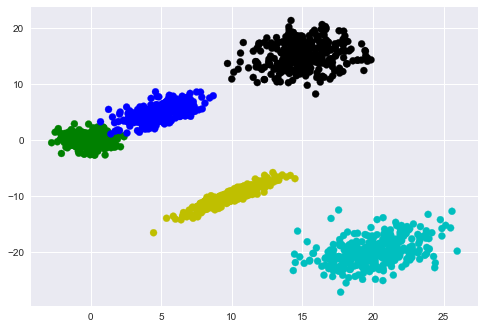

In [5]:
rc=random_clusters(c=5)
col = num_to_colors(rc['d'])
plt.scatter(rc['x'], rc['y'],c=col)
plt.show()

In [6]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='g')
df_circ = pd.concat([df1, df2])

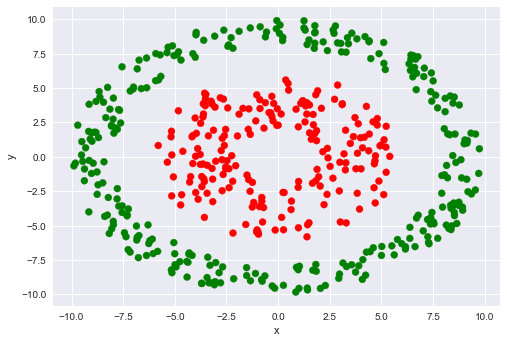

In [7]:

plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

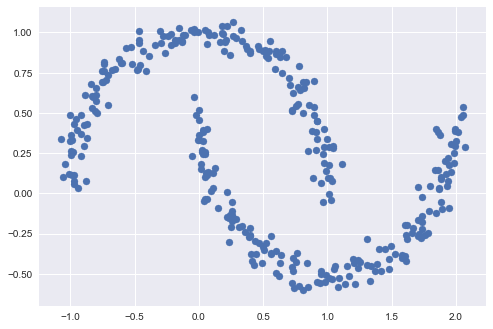

In [8]:
from sklearn.datasets import make_moons
xs, ys = make_moons(333, noise=.055, random_state=0)
plt.scatter(xs[:, 0], xs[:, 1])

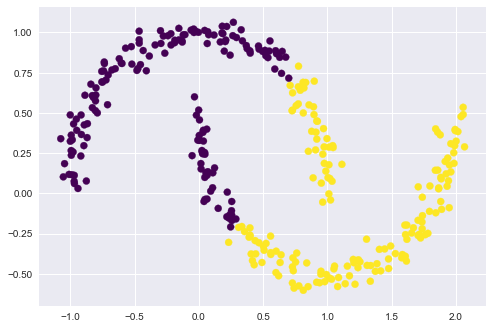

In [9]:
labels = KMeans(2, random_state=0).fit_predict(xs)
plt.scatter(xs[:, 0], xs[:, 1], c=labels,
            s=50, cmap='viridis');

In [10]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (labels)

[1 1 1 ... 0 0 0]


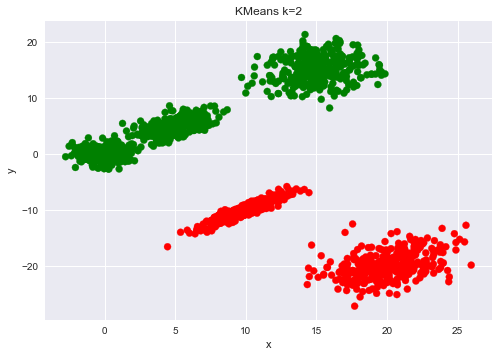

In [11]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(rc['x'], rc['y'], c=colors)
plt.title("KMeans k=2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({2: 666, 1: 333, 0: 333, 3: 333})


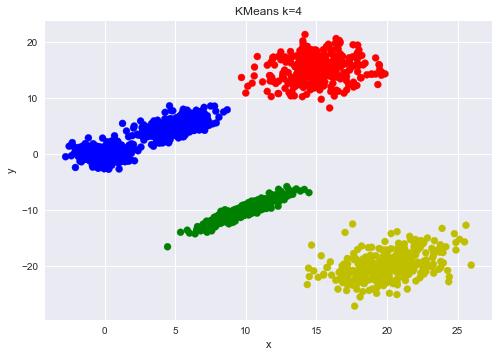

In [12]:
estimator = KMeans(n_clusters=4)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(rc['x'], rc['y'], c=colors)
plt.title("KMeans k=4")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Counter({4: 342, 1: 333, 0: 333, 3: 333, 2: 324})


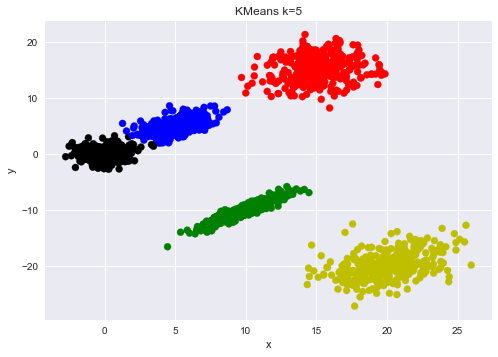

In [13]:
estimator = KMeans(n_clusters=5)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(rc['x'], rc['y'], c=colors)
plt.title("KMeans k=5")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


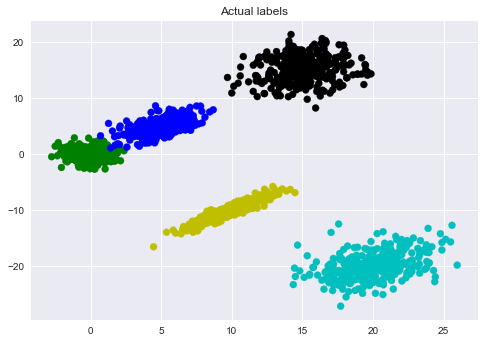

In [14]:
plt.scatter(rc['x'], rc['y'],c=col)
plt.title("Actual labels")
plt.show()

Counter({1: 342, 3: 333, 2: 333, 5: 324, 0: 182, 4: 151})


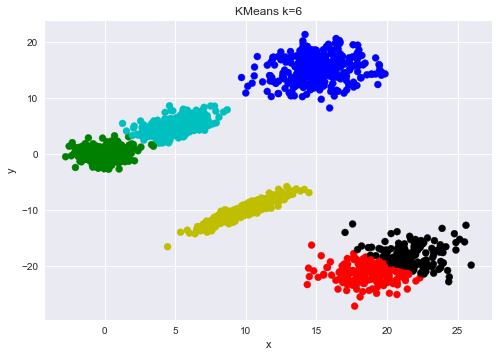

In [15]:
estimator = KMeans(n_clusters=6)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(rc['x'], rc['y'], c=colors)
plt.title("KMeans k=6")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Counter({1: 255, 0: 245})


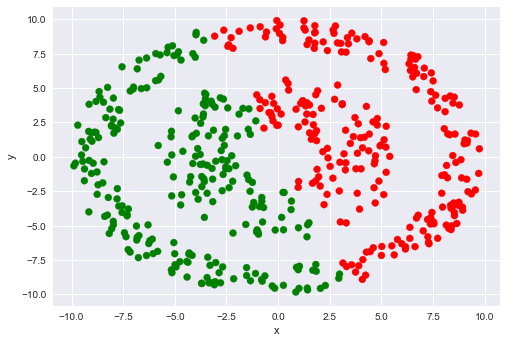

In [16]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({2: 176, 1: 167, 0: 157})


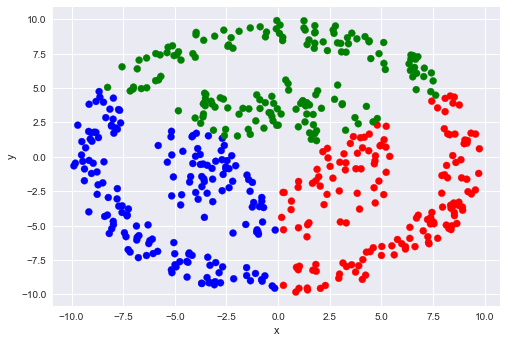

In [17]:
estimator = KMeans(n_clusters=3)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({0: 129, 3: 126, 2: 124, 1: 121})


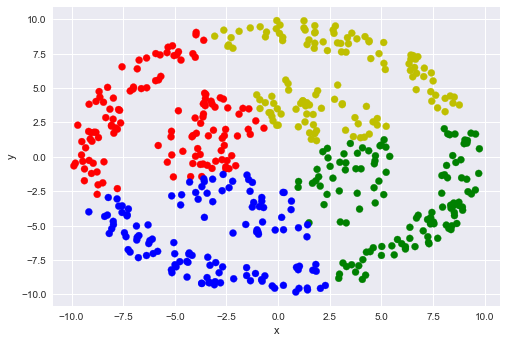

In [18]:
estimator = KMeans(n_clusters=4)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

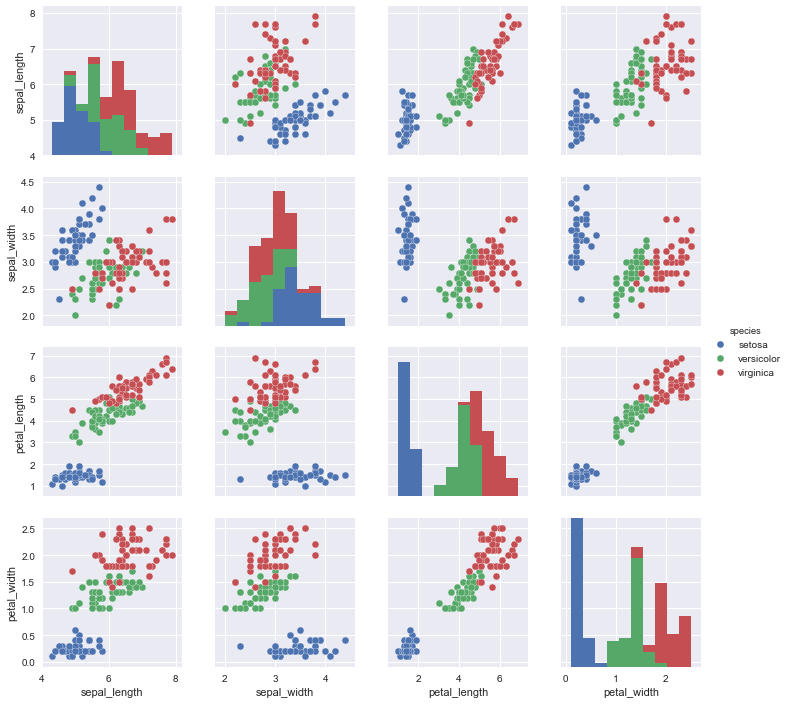

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [19]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
plt.show()

iris.tail()

Counter({0: 58, 1: 51, 2: 41})


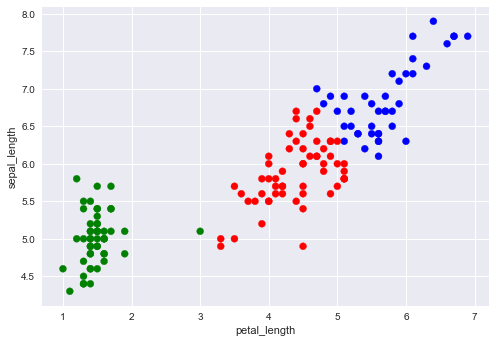

In [20]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()


In [21]:
label_map = {"setosa": 1, "versicolor": 0, "virginica": 2}

true_labels = []
for row in iris.itertuples():
    true_labels.append(label_map[row.species])

number_correct = 0
for t, l in zip(true_labels, labels):
    if t == l:
        number_correct += 1
print (number_correct / float(len(iris)))

0.88


Counter({-1: 386, 2: 16, 3: 15, 0: 14, 4: 14, 1: 13, 7: 12, 5: 10, 8: 10, 6: 10})


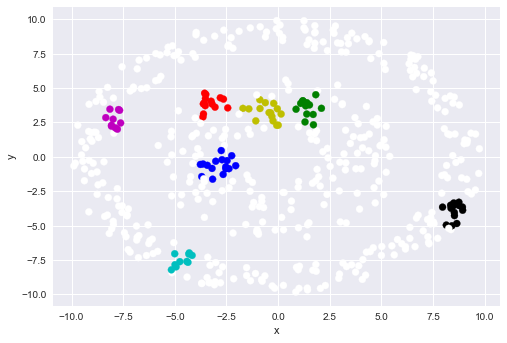

In [22]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.85, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({-1: 417, 1: 16, 3: 14, 0: 13, 2: 10, 4: 10, 6: 10, 5: 10})


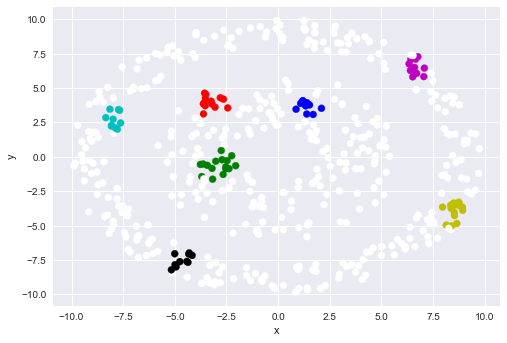

In [23]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


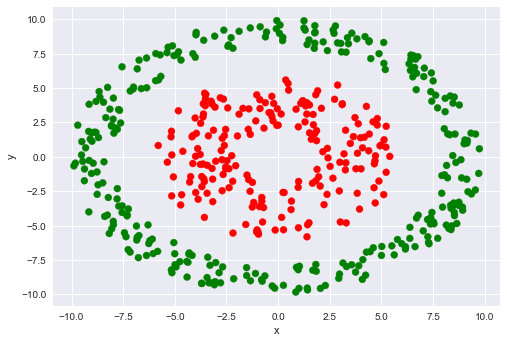

In [24]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/Users/bear/anaconda/lib/python3.6/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


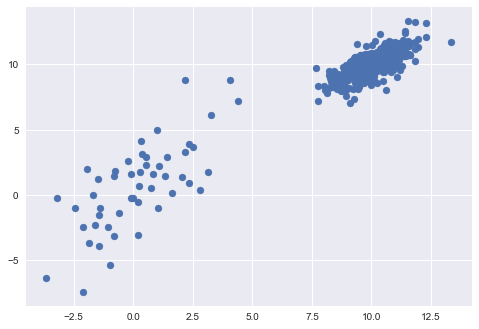

In [25]:
## Create some synthetic data

data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,12],[1,6]])
for i in range(50):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[10,10], cov=[[1,1.1],[0.2,0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'])
plt.show()

Counter({1: 400, 0: 43, -1: 7})


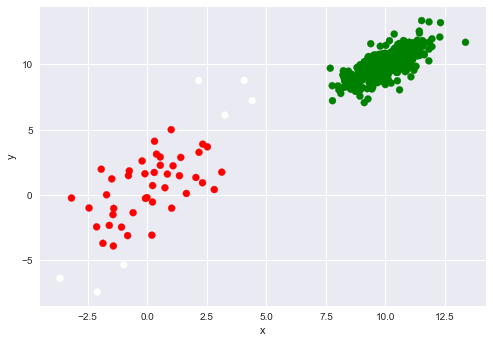

In [26]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 91, 0: 50, -1: 9})


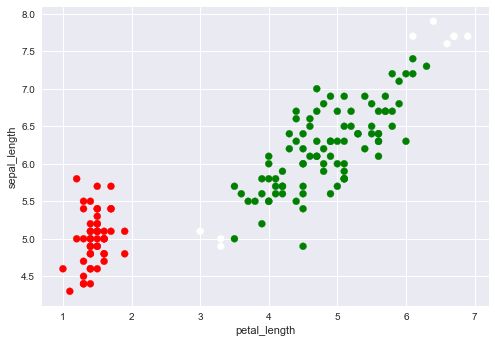

In [27]:
# Fit a DBSCAN
estimator = DBSCAN(eps=0.5, min_samples=10)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()


Counter({1: 100, 0: 49, -1: 1})


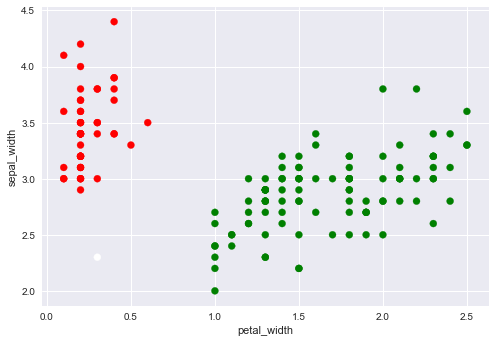

In [28]:
# Fit a DBSCAN
estimator = DBSCAN(eps=0.5, min_samples=10)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_width"], iris["sepal_width"], c=colors)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()


Counter({0: 666, 3: 333, 2: 333, 1: 333})


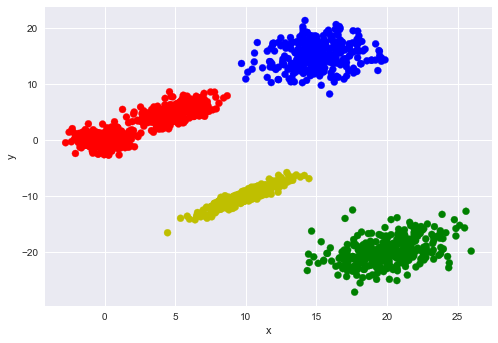

In [29]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(rc['x'], rc['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({0: 328, 1: 172})


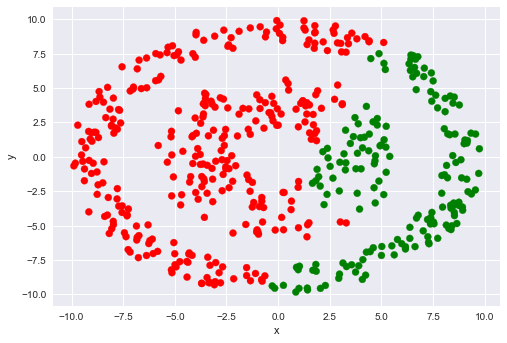

In [30]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [31]:
## Silhouette Coefficient

from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

print (metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({1: 666, 0: 333, 3: 333, 2: 333})
0.7289833933086459


In [32]:
estimator = DBSCAN(eps=1.2, min_samples=10)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))
print (metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({0: 666, 1: 332, 2: 321, 3: 309, -1: 37})
0.7068143583297433


In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.data.shape)
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(1797, 64)


(10, 64)

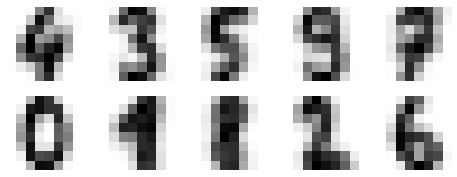

In [34]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [35]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

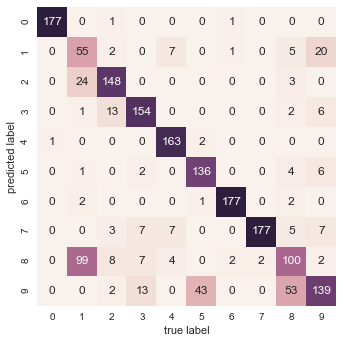

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');